In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math 



def safelog(x):
    return(np.log(x + 1e-10))



In [2]:
np.random.seed(421)
# mean parameters
class_means = np.array([[+0.0, +2.5],
                        [-2.5, -2.0],
                        [+2.5, -2.0]])
# covariance parameters
class_covariances = np.array([[[+3.2, +0.0], 
                               [+0.0, +1.2]],
                              [[+1.2, +0.8], 
                               [+0.8, +1.2]],
                              [[+1.2, -0.8],
                               [-0.8, +1.2]]])
# sample sizes
class_sizes = np.array([120, 80, 100])

In [3]:
# generate random samples
points1 = np.random.multivariate_normal(class_means[0,:], class_covariances[0,:,:], class_sizes[0])
points2 = np.random.multivariate_normal(class_means[1,:], class_covariances[1,:,:], class_sizes[1])
points3 = np.random.multivariate_normal(class_means[2,:], class_covariances[2,:,:], class_sizes[2])
points = np.concatenate((points1, points2, points3))

X = np.vstack((points1, points2, points3))

# generate corresponding labels
y = np.concatenate((np.repeat(1, class_sizes[0]), np.repeat(2, class_sizes[1]), np.repeat(3, class_sizes[2])))
print(points)

[[ 1.7997414   3.16415772]
 [-0.41092895  2.30752957]
 [ 2.14351818  1.59620054]
 [-1.80484727  2.22341154]
 [ 1.35828146  1.47306067]
 [-2.24539007  3.46696747]
 [ 0.55552008  3.87568149]
 [-0.17814965  1.53727062]
 [ 2.00858793  2.75975118]
 [ 1.68046967  3.39095393]
 [-1.43306767  1.99333459]
 [-1.64429705  1.91302696]
 [ 0.8530178   2.12582004]
 [ 0.07648148  2.93305567]
 [-1.2330479   4.03046394]
 [-0.045979    1.71625102]
 [-0.66222891  2.13738353]
 [ 4.50246267  4.15898768]
 [ 0.65523468  1.09073253]
 [ 0.65542467  3.36657839]
 [ 1.47789384  0.76697057]
 [ 0.68167624  1.44428866]
 [-0.87031221  1.53691294]
 [-1.69909104  2.08818437]
 [-0.67550981  2.40875149]
 [ 2.32477962  3.14646518]
 [ 0.85515536  3.44924279]
 [-2.47271367  2.23910578]
 [-1.71191993  1.64905201]
 [-0.24647324  2.60228446]
 [-2.4736941   1.33389922]
 [ 2.37811509  2.40178879]
 [-3.18262423  3.08463693]
 [-0.80255209  2.0760278 ]
 [ 2.51073564  4.55048774]
 [ 0.41067491  1.97414324]
 [ 1.35886712  1.10932915]
 

In [4]:
# write data to a file
np.savetxt("HW1.csv", np.hstack((X, y[:, None])), fmt = "%f,%f,%d")

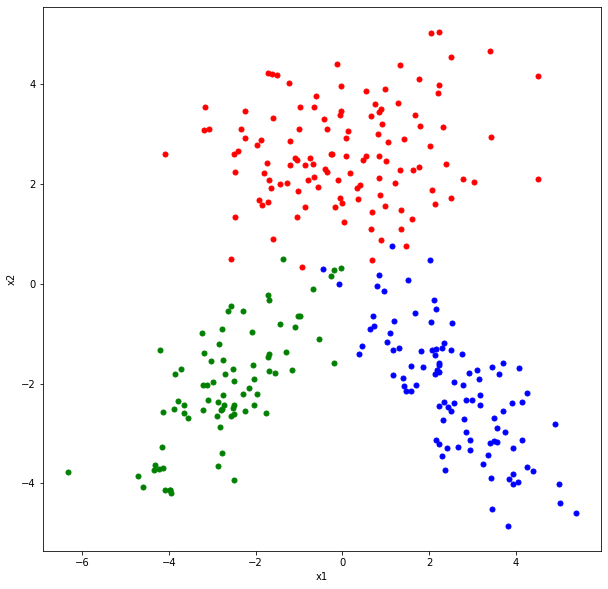

In [5]:
# plot data points generated
plt.figure(figsize = (10, 10))
plt.plot(points1[:,0], points1[:,1], "r.", markersize = 10)
plt.plot(points2[:,0], points2[:,1], "g.", markersize = 10)
plt.plot(points3[:,0], points3[:,1], "b.", markersize = 10)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


In [6]:
# read data into memory
data_set = np.genfromtxt("HW1.csv", delimiter = ",")

# get X and y values
X = data_set[:,[0, 1]]
y_truth = data_set[:,2].astype(float)

# get number of samples
N = data_set.shape[1]
K = np.max(y)

In [7]:
# calculate sample means
sample_means = [np.mean(X[y == (c + 1)], axis = 0) for c in range(K)]

for i in range(K):
    print(sample_means[i])

[0.04453807 2.61225132]
[-2.65871584 -2.04611636]
[ 2.5605445  -2.12492713]


In [8]:
# calculate sample covariance
sample_covariance = [np.cov((X[y == (c + 1)] - sample_means[c]).T) for c in range(K)]

for i in range(K):

    print(sample_covariance[i])

[[2.83985863 0.22625047]
 [0.22625047 1.01248432]]
[[1.43826474 1.02345492]
 [1.02345492 1.37825967]]
[[ 1.42107713 -1.08927413]
 [-1.08927413  1.52276647]]


In [9]:
# calculate prior probabilities
class_priors = [np.mean(y == (c + 1)) for c in range(K)]
print(class_priors)

[0.4, 0.26666666666666666, 0.3333333333333333]


In [10]:
# Multivariate parametric classification
W_1 = np.stack([-0.5*np.linalg.inv(sample_covariance[c]) for c in range(K)])
W_1C = np.stack([np.linalg.inv(sample_covariance[c])@sample_means[c] for c in range(K)])
W_2C = np.stack([-0.5*(sample_means[c].T)@np.linalg.inv(sample_covariance[c])@(sample_means[c])
                -0.5*np.log(np.linalg.det(sample_covariance[c]))+np.log(class_priors[c])for c in range(K)])
X.shape

g_c = np.zeros((300,3))
for c in range(K):
    count = 0
    for i in range(X.shape[0]):
        x = X[i].T
        g_c[count,c] = x.T@W_1[c]@x+W_1C[c].T@x+W_2C[c]
        count +=1

In [11]:
# calculate confusion matrix
y_predicted = np.argmax(g_c, axis = 1) + 1
    
confusion_matrix = pd.crosstab(y_predicted, y, rownames = ['y_pred'], colnames = ['y_truth'])
print(confusion_matrix)


y_truth    1   2   3
y_pred              
1        118   1   1
2          1  78   1
3          1   1  98


TypeError: Input z must be 2D, not 1D

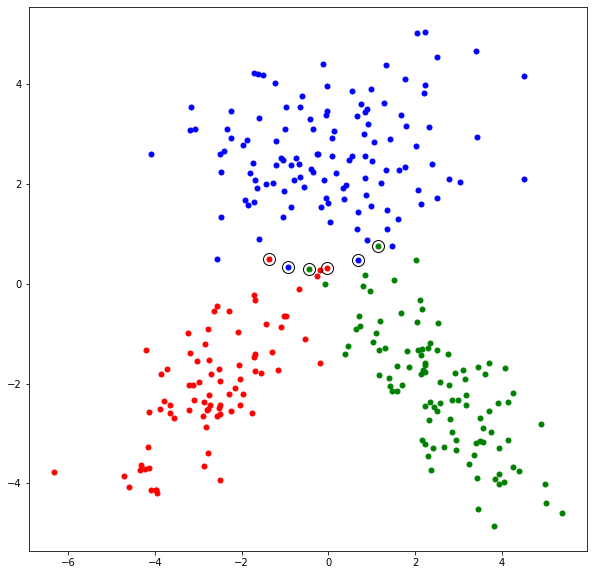

In [12]:
# evaluate discriminant function on a grid
x1_interval = np.linspace(-6, +6, 1201)
x2_interval = np.linspace(-6, +6, 1201)
x1_grid, x2_grid = np.meshgrid(x1_interval, x2_interval)
discriminant_values = ((len(x1_interval), len(x2_interval), K))

plt.figure(figsize = (10, 10))
plt.plot(X[y_truth == 3, 0], X[y_truth == 3, 1], "g.", markersize = 10)
plt.plot(X[y_truth == 2, 0], X[y_truth == 2, 1], "r.", markersize = 10)
plt.plot(X[y_truth == 1, 0], X[y_truth == 1, 1], "b.", markersize = 10)

plt.plot(X[y_predicted != y_truth, 0], X[y_predicted != y_truth, 1], "ko", markersize = 12, fillstyle = "none")
plt.contour(x1_grid, x2_grid, discriminant_values, levels = 0, colors = "k")
plt.contour(x1_grid, x2_grid, discriminant_values, levels = 0, colors = "k")
plt.contour(x1_grid, x2_grid, discriminant_values, levels = 0, colors = "k")


plt.xlabel("x1")
plt.ylabel("x2")
plt.show()